In [1]:
#Install and load library
# update.packages(ask = FALSE)
# install.packages("NLP", dependencies=TRUE)
# install.packages("slam", dependencies=TRUE)
# install.packages("tm", dependencies=TRUE) # for text mining
# install.package("SnowballC", dependencies=TRUE) # for text stemming
# install.packages("wordcloud", dependencies=TRUE)# word-cloud generator
# install.packages("RColorBrewer", dependencies=TRUE) # color palettes
# install.packages('lda', dependencies=TRUE)
# install.packages('modeltools', dependencies=TRUE)
# install.packages('stats4', dependencies=TRUE)
# # install.packages('methods', dependencies=TRUE)
# install.packages('toppicmodels', dependencies=TRUE)
# install.packages('ggplot2', dependencies = TRUE)
# install.packages("NbClust", dependencies = TRUE)
# install.packages("factoextra", dependencies = TRUE)

# install.packages("lda", dependencies = TRUE)
# install.packages("MASS", dependencies = TRUE)
# install.packages("topicmodels", dependencies = TRUE)
# install.packages("lsa", dependencies = TRUE)

In [2]:
setwd("/home/harish/PycharmProjects/Topic-Modeling/")

In [3]:
library(NLP)
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(ggplot2)
library(factoextra)
# library(cluster)
library(NbClust)
library(lsa)
# library(fpc)

#LDA

library(lda)
library(MASS)
library(topicmodels)

Loading required package: RColorBrewer

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [4]:
## BUILDING CORPUS

folder <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/FullDataset/"
summary(folder)
corpus_name <- Corpus(DirSource(folder, recursive=TRUE),readerControl = list(reader=readPlain));

   Length     Class      Mode 
        1 character character 

In [5]:
num_docs <- length(corpus_name)

In [6]:
#---------------Data preprocessing:
print("dimension before:");
print(DocumentTermMatrix(corpus_name));

corpus_name<-tm_map(corpus_name,PlainTextDocument);
corpus_name<-tm_map(corpus_name, content_transformer(tolower));
corpus_name<-tm_map(corpus_name,removeWords,stopwords("english"));
corpus_name<-tm_map(corpus_name,removePunctuation);
corpus_name<-tm_map(corpus_name,removeNumbers);
corpus_name<-tm_map(corpus_name,stripWhitespace);

words_to_remove_in_article<-c("system","reserve","tthe","rnthe","participants", "continue", "open","committee", "federal", "also", "meeting", "FOMC", "\r","\t","Present", "\n", 'year') #irrevalant words
corpus_name<-tm_map(corpus_name, removeWords,words_to_remove_in_article); #removing irrevalant words in the article

corpus_name<-tm_map(corpus_name, stemDocument, language="english");

print("dimension after:");
print(DocumentTermMatrix(corpus_name));

[1] "dimension before:"
<<DocumentTermMatrix (documents: 196, terms: 10800)>>
Non-/sparse entries: 218630/1898170
Sparsity           : 90%
Maximal term length: 26
Weighting          : term frequency (tf)
[1] "dimension after:"
<<DocumentTermMatrix (documents: 196, terms: 12474)>>
Non-/sparse entries: 171522/2273382
Sparsity           : 93%
Maximal term length: 142
Weighting          : term frequency (tf)


In [7]:
#todo: change the bounds, weighttfidf, 

In [8]:
#----------------------Text Analysis------

##build tdm/dtm matrix
tdm <- TermDocumentMatrix(corpus_name,control=list(wordLengths=c(4,Inf),bounds = list(global = c(2,Inf))))
tdm_matrix <- as.matrix(tdm)
print(dim(tdm_matrix))
##build a document/term matrix... words must have length 4
dtm <- DocumentTermMatrix(corpus_name,control=list(wordLengths=c(4,Inf),bounds = list(global = c(2,Inf))))
dtm_matrix <- as.matrix(dtm)
print(dim(dtm_matrix))

[1] 5245  196
[1]  196 5245


In [9]:
dtms <- removeSparseTerms(dtm, 0.93)

In [10]:
m <- as.matrix(tdm)
v <- sort(rowSums(m), decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
print(head(d, 30))
# print(findFreqTerms(dtm,lowfreq = 10))

             word freq
inflat     inflat 8811
econom     econom 7693
price       price 7374
growth     growth 6241
polici     polici 5795
increas   increas 5693
project   project 5519
expect     expect 4670
percent   percent 4658
quarter   quarter 4508
remain     remain 4298
continu   continu 4165
declin     declin 3667
level       level 3588
condit     condit 3586
period     period 3553
rang         rang 3422
consum     consum 3366
risk         risk 3191
financi   financi 3177
fund         fund 3174
month       month 3066
activ       activ 3063
monetari monetari 3008
busi         busi 2994
labor       labor 2981
indic       indic 2978
pace         pace 2894
spend       spend 2827
like         like 2753


## LDA:

In [11]:
# svs = sort.list(abs(svd(dtms)$v[,4]), decreasing = TRUE)
# dtms$dimnames$Terms[head(svs, 6)]

In [12]:

##return top words by concept

##first create function to return top words; require dtms
concept<-function(num){ 
  sv<-sort.list((svd(dtms))$v[,num],decreasing = FALSE)
  # print(sv)
  # print(dtms$dimnames)
  dm<-dtms$dimnames$Terms[head(sv,5)] 
  return(dm)
}

In [13]:
##how many words?
num <- num_docs
i <- 1:num
val <- sapply(i, concept)

In [25]:
val

inflat,price,growth,labor,inflat,pace,rang,econom,level,purchas,⋯,notabl,lead,restrain,offset,european,well,firm,sizabl,record,posit
econom,growth,project,committe,price,increas,price,level,rang,labor,⋯,surg,question,contact,smaller,surg,under,revis,keep,export,come
project,quarter,rang,polici,energi,purchas,growth,appropri,recoveri,product,⋯,high,valu,weaken,hire,under,post,foster,previous,even,stimulus
price,increas,percent,object,expect,remain,inflat,activ,continu,rise,⋯,believ,perhap,rebound,rule,somewhat,anecdot,thought,categori,standard,pressur
polici,busi,expans,fund,labor,cost,number,number,period,percent,⋯,seem,faster,probabl,sharp,comment,area,keep,maintain,discuss,outcom


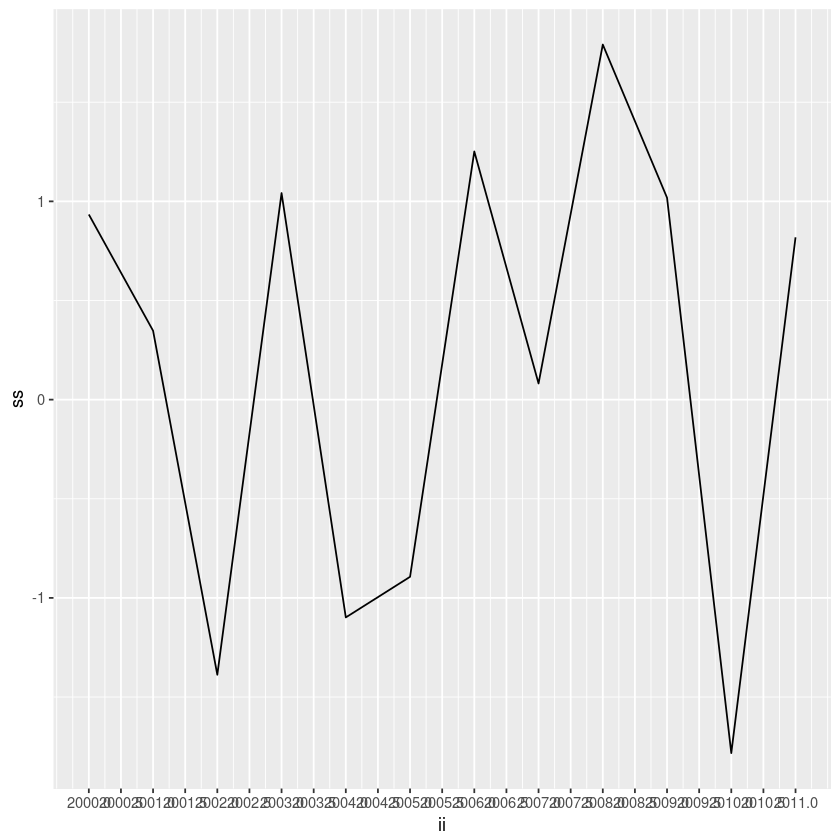

In [38]:
library(ggplot2)
ii <- 2000:2011
ss <- rnorm(12,0,1)
pm <- data.frame(ii,ss)
tmpplot <- ggplot(pm, aes(x = ii, y = ss))
plot <- tmpplot + geom_line() + scale_x_continuous(breaks=seq(2000,2011, 0.5))
plot 

In [14]:
# write.table(val,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)
# ldaGibbs5@gamma

In [15]:
# ##how many words?
# num <- 5
# i <- 1:num
# sapply(i, concept)
# # https://stackoverflow.com/questions/14875493/lda-with-topicmodels-how-can-i-see-which-topics-different-documents-belong-to


In [16]:
# k=5
# ldaGibbs5 <-LDA(dtms, k, method = "Gibbs") 
# #docs to topics 
# ldaGibbs5.topics <- as.matrix(topics(ldaGibbs5))
# #get probability of each topic in each doc
# topicProbabilities <- as.data.frame(ldaGibbs5@gamma)

In [17]:
# topicProbabilities
# nrow(ldaGibbs5@gamma)

In [18]:
# vector <- NULL
# for(i in 1:nrow(ldaGibbs5@gamma)) {
#   vector <- c(vector, ldaGibbs5@gamma[i,])
# }


# Concepts <- rep(c("Concept 1","Concept 2","Concept 3", "Concept 4","Concept 5"),times=102)#why 80?
# TimeByDocs <- as.numeric(rep(1:102,each=5))
# chartdata <- data.frame(Concepts,TimeByDocs,vector)
# myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()


In [19]:
# ggsave(filename="myPlot.png", plot=myplot)

In [20]:
# l<-c()
# i <- 0
# for (j in 1993:2005){
#    l[i] <- j
#     i <- i + 1
# }

In [21]:
##how many words?
# for (k in 2:5){

    num <- num_docs
    i <- 1:num
    val <- sapply(i, concept)
    # https://stackoverflow.com/questions/14875493/lda-with-topicmodels-how-can-i-see-which-topics-different-documents-belong-to
    
k = 4

    ldaGibbs_k <-LDA(dtms, k, method = "Gibbs") 
    #docs to topics 
    ldaGibbs_k.topics <- as.matrix(topics(ldaGibbs_k))
    #get probability of each topic in each doc
    topicProbabilities <- as.data.frame(ldaGibbs_k@gamma)
write.table(val,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)

    vector <- NULL
    for(i in 1:nrow(ldaGibbs_k@gamma)) {
      vector <- c(vector, ldaGibbs_k@gamma[i,])
    }


    Concepts <- rep(c("Concept 1","Concept 2","Concept 3", "Concept 4"),times=num_docs)#why 80?
    TimeByDocs <- as.numeric(rep(1:num_docs,each=k))
    chartdata <- data.frame(Concepts,TimeByDocs,vector)
    myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
    plotname <- paste(k,"png", sep=".");
    ggsave(filename=plotname, plot=myplot)
    
# }

Warning message in write.table(val, file = paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), :
“appending column names to file”Saving 6.67 x 6.67 in image


[1] 1993 1993 1993 1993 1994 1994 1994 1994 1995 1995 1995 1995 1996 1996 1996
 [16] 1996 1997 1997 1997 1997 1998 1998 1998 1998 1999 1999 1999 1999 2000 2000
 [31] 2000 2000 2001 2001 2001 2001 2002 2002 2002 2002 2003 2003 2003 2003 2004
 [46] 2004 2004 2004 2005 2005 2005 2005 2006 2006 2006 2006 2007 2007 2007 2007
 [61] 2008 2008 2008 2008 2009 2009 2009 2009 2010 2010 2010 2010 2011 2011 2011
 [76] 2011 2012 2012 2012 2012 2013 2013 2013 2013 2014 2014 2014 2014 2015 2015
 [91] 2015 2015 2016 2016 2016 2016 2017 2017 2017 2017

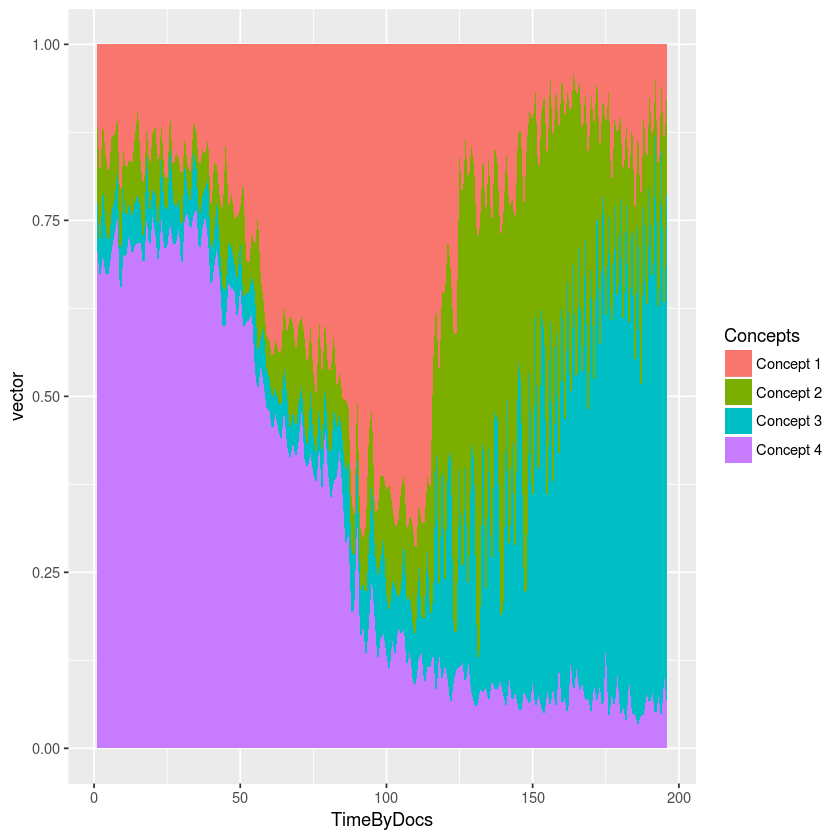

In [52]:
ii <- 1993:2017
TimeByDocs <- as.numeric(rep(1:num_docs,each=k))
plot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
plot 
TimeByDocs <- as.numeric(rep(1993:2017,each=k))
TimeByDocs

In [22]:
# Concepts <- rep(c("Concept 1","Concept 2","Concept 3", "Concept 4","Concept 5"),times=102)#why 80?
#     TimeByDocs <- as.numeric(rep(c("1993","1994","1995","1996","1997","1998","1999",
#                                    "2000","2001","2002","2003","2004","2005"),each=k))
#     chartdata <- data.frame(Concepts,TimeByDocs,vector)
#     myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
# myplot

In [23]:

write.table(topicProbabilities,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)

Warning message in write.table(topicProbabilities, file = paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), :
“appending column names to file”

In [60]:
length(ldaGibbs_k@beta)/4


[1] 1858

In [77]:
ldaGibbs_k@beta

-7.490193,-8.404488,-7.045985,-9.496478,-6.655144,-14.111598,-6.271285,-6.971938,-14.111598,-6.838506,⋯,-14.111598,-14.111598,-14.111598,-14.111598,-14.111598,-14.11160,-14.111598,-14.111598,-14.111598,-14.111598
-11.053402,-8.495806,-14.097925,-14.097925,-14.097925,-14.097925,-6.108025,-10.166099,-6.790722,-6.466978,⋯,-8.956261,-9.835245,-14.097925,-14.097925,-14.097925,-11.70003,-14.097925,-14.097925,-14.097925,-14.097925
-9.440415,-8.528388,-7.102298,-10.457349,-14.389175,-14.389175,-5.733786,-11.991279,-9.371895,-6.962031,⋯,-14.389175,-9.774054,-8.587056,-8.500297,-9.371895,-8.75082,-8.787056,-8.787056,-8.787056,-9.371895
-9.173606,-8.792723,-8.222179,-14.190886,-6.667405,-6.342733,-14.190886,-11.792991,-6.135411,-6.260320,⋯,-14.190886,-14.190886,-14.190886,-14.190886,-14.190886,-14.19089,-14.190886,-14.190886,-14.190886,-14.190886


In [65]:
dtms$dimnames$Terms

[1] "abat"                 "abil"                 "abroad"              
   [4] "abrupt"               "acceler"              "accept"              
   [7] "accommod"             "accompani"            "accord"              
  [10] "account"              "achiev"               "acquisit"            
  [13] "action"               "activ"                "actual"              
  [16] "addit"                "adjust"               "administr"           
  [19] "adopt"                "advanc"               "advers"              
  [22] "affect"               "aggreg"               "aggress"             
  [25] "agre"                 "agreement"            "ahead"               
  [28] "aircraft"             "albeit"               "align"               
  [31] "allow"                "almost"               "alreadi"             
  [34] "alter"                "altern"               "although"            
  [37] "among"                "amount"               "ampl"                
  [40] "analysi"              "anecdot"              "announc"             
  [43] "annual"               "anoth"                "anticip"             
  [46] "apart"                "appar"                "appear"              
  [49] "appreci"              "appropri"             "approv"              
  [52] "area"                 "argu"                 "around"              
  [55] "assembl"              "assess"               "asset"               
  [58] "associ"               "assumpt"              "assur"               
  [61] "attitud"              "attract"              "augment"             
  [64] "author"               "automot"              "avail"               
  [67] "averag"               "away"                 "background"          
  [70] "balanc"               "bank"                 "basi"                
  [73] "begin"                "behavior"             "believ"              
  [76] "benefit"              "best"                 "better"              
  [79] "board"                "bond"                 "boost"               
  [82] "borrow"               "bottom"               "broad"               
  [85] "broader"              "build"                "buildup"             
  [88] "buoy"                 "burden"               "busi"                
  [91] "call"                 "canada"               "capac"               
  [94] "capit"                "care"                 "cash"                
  [97] "categori"             "caution"              "cautious"            
 [100] "center"               "central"              "chairman"            
 [103] "chanc"                "chang"                "circumst"            
 [106] "cite"                 "civilian"             "clear"               
 [109] "close"                "come"                 "comfort"             
 [112] "comment"              "commerci"             "commit"              
 [115] "committe"             "commod"               "compani"             
 [118] "compens"              "competit"             "compon"              
 [121] "comput"               "concentr"             "concern"             
 [124] "conclus"              "condit"               "confid"              
 [127] "congress"             "congression"          "conjunct"            
 [130] "connect"              "consecut"             "consensus"           
 [133] "consequ"              "consider"             "consist"             
 [136] "constraint"           "construct"            "consum"              
 [139] "consumpt"             "contact"              "contain"             
 [142] "contempl"             "context"              "continu"             
 [145] "contract"             "contrast"             "contribut"           
 [148] "control"              "convey"               "corpor"              
 [151] "cost"                 "countri"              "cours"               
 [154] "credibl"              "credit"               "critic"              
 [157] "currenc"              "current"            

In [66]:
ldaGibbs_k$dimnames

ERROR: Error in ldaGibbs_k$dimnames: $ operator not defined for this S4 class


In [80]:
ldaGibbs_k@beta[4,].abs

ERROR: Error in parse(text = x, srcfile = src): <text>:1:20: unexpected symbol
1: ldaGibbs_k@beta[4,].abs
                       ^
